<a href="https://www.kaggle.com/code/abhinavaditya8119/sentiment-analysis-using-nltk-on-amazon-reviews?scriptVersionId=149378451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
# importing helping libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [3]:
# importing data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.shape

(568454, 10)

# EDA for the dataframe

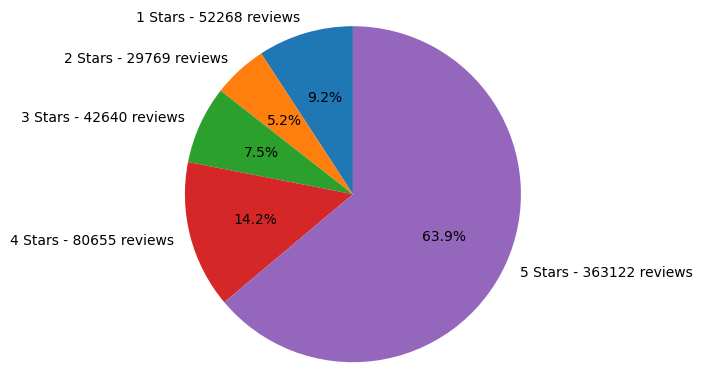

In [7]:
# count of total reviews by percentages

counts = df['Score'].value_counts().sort_index()
plt.pie(counts, labels=[f"{star} Stars - {counts[star]} reviews" for star in counts.index], autopct='%1.1f%%', startangle=90)
    
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [8]:
# using plotly
import plotly.express as px

counts = df['Score'].value_counts().sort_index()

fig = px.bar(counts, title='Customer Reviews')

fig.show()


In [9]:
import random
# 568454 is the total number of reviews
random_number = random.randint(0, 568454)
review_example = df['Text'][random_number]
print(review_example)

# printing a random example of a review from the dataframe

We have purchased several bags of Davidson's tea - love that they are certified organic and are reasonably-priced. The Ceylon has become a favorite for my daughter and me. It it smooth and is delicious black or holds up well to milk. It does need to be steeped carefully as it can become bitter if left too long. The only drawback here is that the last bag we purchased was rather bland Perhaps it was because the leaves were especially large or maybe it was the time of the year, but it seemed to need a lot more tea to make a tasty cup. Overall I highly recommend the Davidson's. I also like the English Breakfast and Irish Breakfast.


In [10]:
# tokenizing them using NLTK
nltk_example = nltk.word_tokenize(review_example)

# tokenized array
nltk_example[:]

['We',
 'have',
 'purchased',
 'several',
 'bags',
 'of',
 'Davidson',
 "'s",
 'tea',
 '-',
 'love',
 'that',
 'they',
 'are',
 'certified',
 'organic',
 'and',
 'are',
 'reasonably-priced',
 '.',
 'The',
 'Ceylon',
 'has',
 'become',
 'a',
 'favorite',
 'for',
 'my',
 'daughter',
 'and',
 'me',
 '.',
 'It',
 'it',
 'smooth',
 'and',
 'is',
 'delicious',
 'black',
 'or',
 'holds',
 'up',
 'well',
 'to',
 'milk',
 '.',
 'It',
 'does',
 'need',
 'to',
 'be',
 'steeped',
 'carefully',
 'as',
 'it',
 'can',
 'become',
 'bitter',
 'if',
 'left',
 'too',
 'long',
 '.',
 'The',
 'only',
 'drawback',
 'here',
 'is',
 'that',
 'the',
 'last',
 'bag',
 'we',
 'purchased',
 'was',
 'rather',
 'bland',
 'Perhaps',
 'it',
 'was',
 'because',
 'the',
 'leaves',
 'were',
 'especially',
 'large',
 'or',
 'maybe',
 'it',
 'was',
 'the',
 'time',
 'of',
 'the',
 'year',
 ',',
 'but',
 'it',
 'seemed',
 'to',
 'need',
 'a',
 'lot',
 'more',
 'tea',
 'to',
 'make',
 'a',
 'tasty',
 'cup',
 '.',
 'Overall'

# Pre processing data

In [11]:
import re
import string

# cleaning the text by removing tags, punctuations and special symbols
all_reviews = df['Text']
all_reviews[10]

cleaned_sentences = []

def clean_sentence(sentence):
    # Remove HTML tags
    sentence = re.sub(r'<.*?>', '', sentence)
    
    # Remove special symbols
    sentence = ''.join(char for char in sentence if char.isalnum() or char.isspace())
    
    # Remove punctuation/
    sentence = ''.join(char for char in sentence if char not in string.punctuation)
    
    return sentence

for i in range(0,10):
    cleaned_sentence = clean_sentence(all_reviews[i])
    cleaned_sentences.append(cleaned_sentence)
    

In [12]:
# removing stop words (list taken from https://gist.github.com/sebleier/554280)
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on',
    'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
    'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
]

for text in cleaned_sentences:
    tokenized_words = nltk.word_tokenize(text)
    final_cleaning = [word for word in tokenized_words if word.lower() not in stop_words]

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(sentence):
    score = SentimentIntensityAnalyzer().polarity_scores(sentence)
    print(cleaned_sentences[0])
    print(score)
    
analyze_sentiment(cleaned_sentences[2])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than  most
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

